In [316]:
import numpy as np
import pandas as pd

In [317]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [318]:
df = pd.read_csv('/content/drive/MyDrive/Documents/CSV/scores_data.csv')
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


The column names need some cleaning.

In [320]:
df.columns = [ cn.replace(' ', '') for cn in df.columns ]
df.columns = [ cn.lower() for cn in df.columns ]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   batch    149 non-null    object
 1   user_id  149 non-null    object
 2   score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


Convert the the scores from object to number type. For this, since each denominator is same, the denominator will be ignored.

In [321]:
df['num_score'] = df['score'].apply(lambda x : x.replace(' ', '').replace('/7', '')).apply(int)

In [322]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   batch      149 non-null    object
 1   user_id    149 non-null    object
 2   score      149 non-null    object
 3   num_score  149 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.8+ KB


,batch,user_id,score,num_score
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


In [323]:
for b in df['batch'].unique(): print(b)

AI_ELITE_7
AI_ELITE_6
AI_ELITE_4


There exist only 3 batches.

#### Data characteristics

In [324]:
global_mean = df['num_score'].mean()
print(global_mean)
df.describe()

4.382550335570469


,num_score
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


`global_mean` is the average score across all batches.

#### Characteristics per batch

In [325]:
df.groupby('batch')['num_score'].describe()

,count,mean,std,min,25%,50%,75%,max
batch,,,,,,,,
AI_ELITE_4,48.0,3.791667,1.443376,0.0,3.0,4.0,4.25,7.0
AI_ELITE_6,48.0,4.229167,1.640441,0.0,3.0,4.0,5.00,7.0
AI_ELITE_7,53.0,5.056604,1.446682,2.0,4.0,5.0,6.00,7.0


Observations
- `global_mean` is `4.382550`.
- mean score of `AI_ELITE_4` is less than `global_mean`.
- mean score of `AI_ELITE_6` is close but less than `global_mean`.
- mean score of `AI_ELITE_7` is above `global_mean`.
- minimum score of `AI_ELITE_7` is `2`.

Do note how `AI_ELITE_7` has a rather low standard deviation.

Combine this with the fact that `AI_ELITE_7` has a mean score above average, we can say that this batch has a lot of users scoring above average.

This means, this batch is superior.

#### Standard deviations of batch scores

In [326]:
for grp in df['batch'].unique():
    print(grp, df[
        (df['batch'] == grp)
    ]['num_score'].std())

AI_ELITE_7 1.4466818046245138
AI_ELITE_6 1.6404408246842614
AI_ELITE_4 1.4433756729740643


`AI_ELITE_7` and `AI_ELITE_4` have lower standard deviations and therefore are more consistent with their scores.

However, `AI_ELITE_7` has higher mean score.

#### Above average scores

In [327]:
for grp in df['batch'].unique():
    print(grp, len(
        df[
            (df['num_score'] >= global_mean) & (df['batch'] == grp)
        ]
    ))

AI_ELITE_7 34
AI_ELITE_6 22
AI_ELITE_4 12



It can be observed that `AI_ELITE_7` has 34 users scoring above the `global_mean`. If one must rank batches by decreasing order of performance it would be:
- AI_ELITE_7
- AI_ELITE_6
- AI_ELITE_4

#### Plot of scores per batch

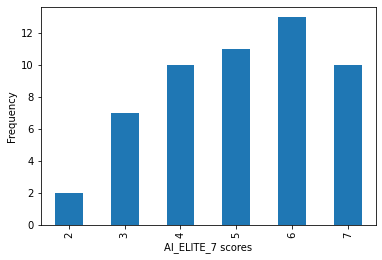

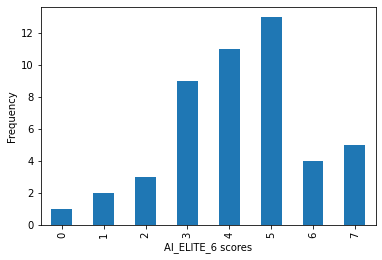

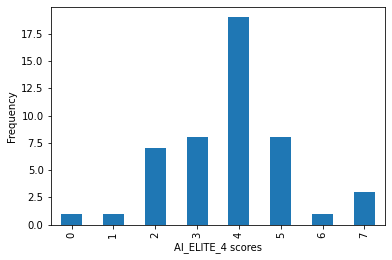

In [328]:
for grp in df['batch'].unique():
    df[df['batch'] == grp]['num_score'].value_counts().sort_index().plot(
        kind='bar',
        xlabel = '%s scores' % grp,
        ylabel = 'Frequency'
    )
    plt.show()

It can be observed that `AI_ELITE_7` users score closer to the maximum, and also, has no user scoring under `2`.

In comparison, other batches have a few users scoring below `2`.

This is an indication of `AI_ELITE_7`'s superior performance.

#### Conclusion
`AI_ELITE_7` has the best performance of all three batches with majority of its users scoring close to or above average.

#### Below average users
In case one must focus on users who perform poorly, the following information can be used.

In [329]:
df_belowavg = df[df['num_score'] < global_mean]

In [330]:
df_belowavg.info()
df_belowavg.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 4 to 148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   batch      81 non-null     object
 1   user_id    81 non-null     object
 2   score      81 non-null     object
 3   num_score  81 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


,batch,user_id,score,num_score
4,AI_ELITE_7,uid_145,4 / 7,4
8,AI_ELITE_7,uid_141,3 / 7,3
11,AI_ELITE_7,uid_138,3 / 7,3
20,AI_ELITE_7,uid_129,4 / 7,4
25,AI_ELITE_7,uid_124,3 / 7,3


Apparently, there are 81 such users.

#### Count of such users per batch

In [331]:
for grp in df_belowavg['batch'].unique():
    print(grp, len(
        df_belowavg[
            df_belowavg['batch'] == grp
        ]
    ))

AI_ELITE_7 19
AI_ELITE_6 26
AI_ELITE_4 36


In [332]:
# uncomment to save
# df_belowavg.to_csv('/content/drive/MyDrive/Documents/CSV/belowavg_scores_data.csv')